In [129]:
#Importing all the required libraries
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [130]:
#Reading the required file
df= pd.read_csv("/Users/arjunbabu/neuroflow_data_challenge/phq_all_final.csv")

Data Exploratory Analysis

In [131]:
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


Assuming that proper aggrigation was done to calcute the scores.

In [132]:
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  53698 non-null  object
 1   patient_id            53698 non-null  int64 
 2   type                  53698 non-null  object
 3   patient_date_created  53698 non-null  object
 4   score                 53698 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


In [133]:
#Checking For Na's
df.isna().sum()

date                    0
patient_id              0
type                    0
patient_date_created    0
score                   0
dtype: int64

In [134]:
# Checking the number of categories in the "Type" column.
df["type"].nunique()

1

Since there is only one catogory in Type, gad7, its not adding any information in the analysis. 

In [135]:
#Total number of distinct patients 
df["patient_id"].nunique()

15502

In [136]:
#Number of unique scores
df["score"].nunique()

22

In [137]:
#lets change the data types appropriately

df["date"]=pd.to_datetime(df["date"])
df["patient_date_created"]=pd.to_datetime(df["patient_date_created"])
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53698 entries, 0 to 53697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  53698 non-null  datetime64[ns]
 1   patient_id            53698 non-null  int64         
 2   type                  53698 non-null  object        
 3   patient_date_created  53698 non-null  datetime64[ns]
 4   score                 53698 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 2.0+ MB


In [138]:
# Let's visualize the data to check the distribution of scores in the entire dataset

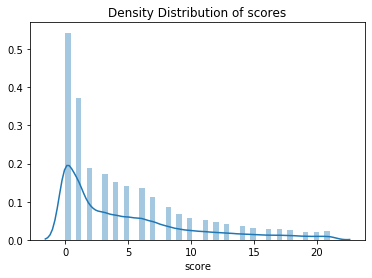

In [139]:
plt.title("Density Distribution of scores")
sns.distplot(df.score)

As you can see it's skewed data. Most of the scores are on the lower side in the data set, so the probability of getting a lower score is higher.


In [140]:
#Number of times the score waas 0
df["score"][df["score"]==0].count()

12247

In [141]:
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9


When screening for anxiety disorders, a recommended threshold for further clinical evaluation (FCE) is a score of 10 or greater.
So I am making a new feature called FCE. Which will be one, if the score is equal to or more than 10.

In [142]:
df["Fce"]=np.where(df["score"]>=10,1,0)

In [143]:
df.head()

,date,patient_id,type,patient_date_created,score,Fce
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6,0
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1,0
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10,1
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7,0
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9,0


In [144]:
df=df.reset_index()

In [145]:
#Number of further clinical evaluations required.
df.Fce.sum()

9301

In [146]:
# let's find the time interval between each assessment for each patient
df_diff=df.groupby("patient_id")["date"].diff().reset_index()
df_diff=df_diff.rename({"date":"assignment_interval"},axis=1)

# lets join this to the main table
df=df.merge(df_diff, how="left", on="index")
del df["index"]
df.head()

,date,patient_id,type,patient_date_created,score,Fce,assignment_interval
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6,0,NaT
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1,0,81 days 04:22:28.345715
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10,1,NaT
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7,0,28 days 01:52:58.999614
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9,0,28 days 00:40:27.355389


In [147]:
# Now let's replace NaT with 0 as its the first assessment taken by each patient
df=df.replace({pd.NaT: 0})

Progress is good if the score reduces and FCE is = 0, that is further clinical evaluations would be not required.

In [148]:
# Let's add on more features, which would classify the severity of the patient based on the scores.
def Severity_label_func(x):
    if 0 <= x <= 5:
        return 'Low to Minimal'
    elif 6 <= x <= 10:
        return 'Mild'
    elif 11 <= x <= 15:
        return 'Moderate'
    else:
        return 'Severe'

df['Severity_label'] = df['score'].apply(Severity_label_func)

In [149]:
# Patients who need further clinical evaluation 
df_fce=df[df["Fce"]==1]
df_fce

,date,patient_id,type,patient_date_created,score,Fce,assignment_interval,Severity_label
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10,1,0,Mild
37,2019-06-16 18:09:03.026395,7561,gad7,2019-06-03 19:37:02.508283,19,1,0,Severe
38,2019-07-14 22:52:38.052850,7561,gad7,2019-06-03 19:37:02.508283,16,1,28 days 04:43:35.026455,Severe
39,2019-08-11 17:29:38.271887,7561,gad7,2019-06-03 19:37:02.508283,20,1,27 days 18:37:00.219037,Severe
40,2019-08-11 17:30:59.361900,7561,gad7,2019-06-03 19:37:02.508283,18,1,0 days 00:01:21.090013,Severe
...,...,...,...,...,...,...,...,...
53646,2020-07-28 21:58:46.117656,8302,gad7,2020-07-28 21:51:10.967869,12,1,0,Moderate
53647,2020-07-30 03:36:02.547868,15772,gad7,2020-07-28 22:10:48.511089,11,1,0,Moderate
53648,2020-07-29 14:29:10.506432,1414,gad7,2020-07-28 22:41:28.318683,11,1,0,Moderate
53667,2020-07-29 18:11:09.707463,14565,gad7,2020-07-29 18:10:20.249023,14,1,0,Moderate


In [150]:
# now let's see which all patients have more number of FCE requirements 
df_num_fce=df_fce.groupby("patient_id")["Fce"].sum().reset_index()
df_num_fce.sort_values("Fce", ascending=False).head()

,patient_id,Fce
2579,10687,83
2788,11538,32
3554,14717,19
2233,9291,18
431,1867,18


In [163]:
#Lets list only the patient with number of FCE more than ten 10 and find the most recent date of FCE = 1 and corresponding score

df_top_fce = df_num_fce[df_num_fce["Fce"]>10].sort_values(by=['Fce'], ascending=False)

df_FCE_Date = df.merge(df_top_fce, how="right", on="patient_id")
df_FCE_Date.groupby("patient_id").agg({"date":"max","score":"last","Fce_x":"last"}).reset_index()

,patient_id,date,score,Fce_x
0,1099,2020-04-29 12:05:53.930136,16,1
1,1766,2019-09-21 09:52:50.913996,16,1
2,1867,2020-02-29 13:33:58.031608,10,1
3,2285,2020-07-28 14:12:11.818972,9,0
4,3182,2020-06-16 10:11:07.562655,18,1
5,3457,2020-05-22 11:16:38.197029,16,1
6,3717,2020-05-19 12:05:01.330074,18,1
7,4576,2020-05-03 13:42:02.067746,11,1
8,6142,2020-05-25 17:09:14.612271,5,0
9,7568,2020-04-12 17:52:21.464360,18,1


Most of them are in severe conditions at the end of the last test. The providers will have to look more into their cases. Only 7 of the patients went under a score of 10, they don't need any further clinical evaluation, but the rest 29 patients require further clinical evaluation.

This is alarming! because these patients have done a lot of tests that were tagged as further clinical evaluation required. Yet displaying high scores in the last test they did. More attention needs to be given to this group of patients.

In [164]:
#the patient with the most number of FCE
m=df_num_fce["Fce"].max()
df_num_fce[df_num_fce["Fce"]==m]

,patient_id,Fce
2579,10687,83


In [40]:
# Lets look at why patient 10687 is having very severe scores with 83 number of FCE requirement

index=10687
df[df["patient_id"]==index]

,date,patient_id,type,patient_date_created,score,Fce,assignment_interval,Severity_label
572,2019-06-18 13:18:43.179145,10687,gad7,2019-06-12 16:32:01.993418,13,1,0,Moderate
573,2019-06-20 06:01:13.569266,10687,gad7,2019-06-12 16:32:01.993418,12,1,1 days 16:42:30.390121,Moderate
574,2019-06-22 13:32:11.049223,10687,gad7,2019-06-12 16:32:01.993418,14,1,2 days 07:30:57.479957,Moderate
575,2019-06-24 06:07:19.920380,10687,gad7,2019-06-12 16:32:01.993418,15,1,1 days 16:35:08.871157,Moderate
576,2019-06-26 05:54:12.661853,10687,gad7,2019-06-12 16:32:01.993418,9,0,1 days 23:46:52.741473,Mild
...,...,...,...,...,...,...,...,...
651,2019-11-21 10:32:27.447941,10687,gad7,2019-06-12 16:32:01.993418,18,1,1 days 23:48:34.038749,Severe
652,2019-11-21 10:32:46.771491,10687,gad7,2019-06-12 16:32:01.993418,18,1,0 days 00:00:19.323550,Severe
653,2019-11-25 10:52:01.141590,10687,gad7,2019-06-12 16:32:01.993418,20,1,4 days 00:19:14.370099,Severe
654,2019-11-27 10:40:38.992561,10687,gad7,2019-06-12 16:32:01.993418,20,1,1 days 23:48:37.850971,Severe


Assuming the provider did not ask to take all these tests. The patient is doing a lot of tests on a single day. It's a red flag for sure, paranoia could be a cause. It could be anything else too. so they need to be contacted and proper treatment plans have to be put in place.

### So we can go ahead and visualize the progress. 

Since these visualizations are mainly for the Doctors, providers, and patients. 
I would like to keep it as simple and readable as possible to make it easy for them to understand it.

Enter your Patient Id to track their progress: 2780


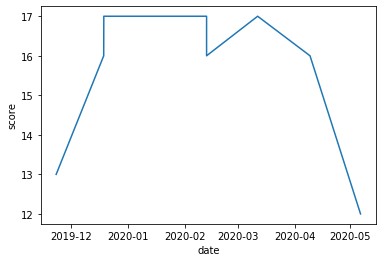

In [165]:
#Lets visualize each patients progress
# Just enter the Patient Id to track their progress
index = int(input("Enter your Patient Id to track their progress: "))
df_patient=df[df["patient_id"]==index]
sns.lineplot(data=df_patient, x="date", y="score")

The above shows the progress of patient 2780's scores. This can be used to check the results for any patient. Just enter the patient ID in the input field and the graph will be generated.

Well for better visualization and story-making to present to the clients, let's use Tableau.

In [34]:
#Saving the final data into CSV to export to Tableau
df.to_csv("Generalized_Anxiety_Disorder_data_(GAD7).csv", index=False)

### I would love to feed the journal entry data to perform sentiment analysis and topic modeling. This will help to identify why the scores are increasing or decreasing. This information could be used to help understand and prescribe further treatments.

### Link to the final Tableau story
https://public.tableau.com/profile/arjun.babu4899#!/vizhome/NeuroFlow_Viz/Story1